In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*東元*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2\\2013東元致股東.txt',
 './letterto shareholders2\\2014東元致股東.txt',
 './letterto shareholders2\\2015東元致股東.txt',
 './letterto shareholders2\\2016東元致股東.txt',
 './letterto shareholders2\\2017東元致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.389 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['股東 女士 回顧 在 懸崖 陰影 及 量化 寬 鬆 政策 退場 疑慮 下 全球 復 甦 遲緩 國內 受日圓 貶值 帶來 之 衝擊 使 出口 表現 國 內 率 有 改善 但 增加 幅度 並 不明 顯 本 在 全體 同仁 努力 下 充 分 掌握 獲利 之 商機 淨利 創下 近年 來 新高 一 經營 結果 檢討 營業 計畫 實施 及 獲利 分析 如下 本 報表 率 營業 收入 淨額 營業 利益 淨利 綜合淨利 營業 收入 重電事業 大馬 達產品 接單 及 出貨 順暢 承接 之 收入 增加 營收 呈 現成長 但家 電產品 受國內 復 甦 不如 及 實質 薪資 減少 不利因素 消費者 購買 意願 而 下滑 整體 而言 全 營收 營業 利益 因較 高 毛利 之小馬達 及家 電產品 佔 營收 比重 下降 使 毛利 額 降低 實施 二代 健保使 健保費用 增加 回 沖 多 之 呆 帳費用 使營業 利益 減少 營業外 收支 過去 於 提升 轉投資 績效 之 改善 做法 已經顯 現 效益 採權益法 認列 之 投資 利益 大幅 增加 使營業 外 收支 淨 額 提高 整體 而言 全 淨利 壹 致股 東報 告書 研究 成功 之產品 低壓 車用 馬 低速 電動 車 控制器 小風機 逆 變器 變頻器 多機 聯動 控制 等等 並獲 得 項 精 品獎 及 項國 內外 專利 本 及 子公司 合 併 報表 率 營業 收入 淨額 營業 利益 淨利 綜合 利益 淨利 歸屬 於 母公司 業主 非 控制 權益 綜合淨 利歸屬 於 母公司 業主 非 控制 權益 合 併 營業 收入 於 子公司 東訊及 新增 合 併 個 體堃霖 之 營收 挹注 使 合 併 營 收成 長 營業 利益 除營 收成 長 所 增加 之 利益 外 高 毛利 馬 佔 營收 比重 提高 營業 精簡 控管 下 合 併 營業 利益 合 併 營業外 收支 淨額 提高 主因 美金 升值 產生 之 兌換 利益 採權益法 認列 之 投資 利益 增加 合 併 其他 綜合淨利 提高 來 自備 供 出售 金融 資產 未實 現評價 利益 提高 所致 整體 而言 合 併 淨利 合 併 綜合淨利 二 營業 計畫 概要 展望 行政院 主計處 預測 國內 之 率 度提高 預測 對 全球 景氣 也 預測 呈 現成長 趨勢 充分 掌握 帶來 之 商機 本 之經 營方針 除 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  871


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 871)


<5x871 sparse matrix of type '<class 'numpy.float64'>'
	with 1446 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
上市 0.06401234398361334 0 6
下降 0.06401234398361334 0 11
使營業 0.06401234398361334 0 84
充分 0.06401234398361334 0 107
內外 0.0538492017739307 0 112
全球 0.06831796493665102 0 115
公布 0.07711491314272259 0 122
利益 0.3500198115305495 0 141
商機 0.09109061991553469 0 201
國內 0.1076984035478614 0 217
地區 0.0538492017739307 0 223
增加 0.18847220620875743 0 235
外銷 0.09601851597542001 0 240
子公司 0.06831796493665102 0 257
客戶 0.0538492017739307 0 265
帶來 0.06401234398361334 0 314
掌握 0.06401234398361334 0 371
採權益法 0.07711491314272259 0 372
控制 0.09601851597542001 0 375
提升 0.0538492017739307 0 384
提高 0.19203703195084001 0 386
擴大新產品 0.09558194716856859 0 393
收入 0.11386327489441836 0 399
收將 0.09558194716856859 0 401
收成 0.08077380266089604 0 403
收支 0.06831796493665102 0 404
改善 0.06401234398361334 0 410
整體 0.13663592987330203 0 419
新產品 0.08077380266089604 0 433
明顯 0.07711491314272259 0 442
景氣 0.06401234398361334 0 444
業主 0.06401234398361334 0 474
權益 0.06401234398361334 0 497
歐洲 0.0538492017739307 0 49

歐規 0.05399134015730809 3 500
正開 0.05399134015730809 3 502
毛利 0.06083555851919041 3 506
水循 0.05399134015730809 3 508
水資源 0.05399134015730809 3 509
油礦 0.05399134015730809 3 513
注入 0.05399134015730809 3 520
海內外 0.10798268031461618 3 522
海嘯 0.05399134015730809 3 523
海外 0.06083555851919041 3 524
海峽 0.05399134015730809 3 525
淨利 0.06083555851919041 3 528
淨利為 0.05399134015730809 3 529
淨利達 0.10798268031461618 3 531
淨額 0.051454325745489506 3 532
深化 0.08711974656358856 3 533
減速機 0.05399134015730809 3 540
灣經濟 0.05399134015730809 3 544
為營 0.05399134015730809 3 546
營收 0.051454325745489506 3 548
營業 0.20581730298195802 3 550
營業費 0.05399134015730809 3 552
營運尚 0.05399134015730809 3 554
獲利 0.06083555851919041 3 561
率較 0.05399134015730809 3 562
環保產品 0.051454325745489506 3 572
環泵浦馬達 0.05399134015730809 3 574
生產力 0.05399134015730809 3 576
產品線 0.05399134015730809 3 579
產銷 0.05399134015730809 3 582
發及 0.05399134015730809 3 588
發電廠 0.05399134015730809 3 591
目標 0.05399134015730809 3 595
礦業客 0.05399134015730809 

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2\2013東元致股東.txt,./letterto shareholders2\2014東元致股東.txt,./letterto shareholders2\2015東元致股東.txt,./letterto shareholders2\2016東元致股東.txt,./letterto shareholders2\2017東元致股東.txt
0,一對,0.000000,0.044572,0.000000,0.000000,0.000000
1,一次性,0.000000,0.000000,0.000000,0.000000,0.054290
2,一步,0.000000,0.044572,0.000000,0.000000,0.000000
3,一級機,0.038557,0.035960,0.000000,0.000000,0.000000
4,一貫,0.000000,0.035960,0.041896,0.000000,0.000000
5,上升,0.000000,0.025111,0.058511,0.060836,0.030586
6,上市,0.064012,0.029850,0.034777,0.000000,0.000000
7,上述,0.000000,0.000000,0.000000,0.053991,0.000000
8,下游,0.000000,0.000000,0.051928,0.000000,0.000000
9,下滑,0.032006,0.149252,0.069554,0.000000,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2\2013東元致股東.txt,./letterto shareholders2\2014東元致股東.txt,./letterto shareholders2\2015東元致股東.txt,./letterto shareholders2\2016東元致股東.txt,./letterto shareholders2\2017東元致股東.txt
0,一對,0.000000,0.044572,0.000000,0.000000,0.000000
1,一次性,0.000000,0.000000,0.000000,0.000000,0.054290
2,一步,0.000000,0.044572,0.000000,0.000000,0.000000
3,一級機,0.038557,0.035960,0.000000,0.000000,0.000000
4,一貫,0.000000,0.035960,0.041896,0.000000,0.000000
5,上升,0.000000,0.025111,0.058511,0.060836,0.030586
6,上市,0.064012,0.029850,0.034777,0.000000,0.000000
7,上述,0.000000,0.000000,0.000000,0.053991,0.000000
8,下游,0.000000,0.000000,0.051928,0.000000,0.000000
9,下滑,0.032006,0.149252,0.069554,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0445721 , 0.        , 0.0445721 , ..., 0.        , 0.0445721 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05192849, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05429024, 0.        , ..., 0.        , 0.        ,
        0.05429024]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一對,0,1,0,0,0
1,一次性,0,0,0,0,1
2,一步,0,1,0,0,0
3,一級機,1,1,0,0,0
4,一貫,0,1,1,0,0
5,上升,0,1,2,2,1
6,上市,2,1,1,0,0
7,上述,0,0,0,1,0
8,下游,0,0,1,0,0
9,下滑,1,5,2,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一對,0,1,0,0,0
1,一次性,0,0,0,0,1
2,一步,0,1,0,0,0
3,一級機,1,1,0,0,0
4,一貫,0,1,1,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一對,0,1,0,0,0
1,一次性,0,0,0,0,1
2,一步,0,1,0,0,0
3,一級機,1,1,0,0,0
4,一貫,0,1,1,0,0
5,上升,0,1,2,2,1
6,上市,2,1,1,0,0
7,上述,0,0,0,1,0
8,下游,0,0,1,0,0
9,下滑,1,5,2,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一對': 1,
 '一次性': 1,
 '一步': 1,
 '一級機': 2,
 '一貫': 2,
 '上升': 6,
 '上市': 4,
 '上述': 1,
 '下游': 1,
 '下滑': 8,
 '下跌': 5,
 '下降': 6,
 '不利因素': 1,
 '不如': 1,
 '不振': 1,
 '不明': 1,
 '不確': 2,
 '不足': 1,
 '世正': 1,
 '並創': 1,
 '並將': 1,
 '並已': 1,
 '並引進': 1,
 '並採取': 1,
 '並朝': 2,
 '並獲': 10,
 '並落實': 2,
 '中國': 2,
 '中國及': 1,
 '中國大': 1,
 '中國大陸': 1,
 '中壓': 1,
 '中壓變': 2,
 '中央': 1,
 '中貿': 1,
 '主因': 1,
 '主管': 2,
 '主計處': 3,
 '主軸': 2,
 '之外': 2,
 '之小馬達': 1,
 '之廠': 1,
 '之新': 1,
 '之潮': 1,
 '之營收': 1,
 '之產品': 4,
 '之經': 1,
 '之誠信': 2,
 '事業則': 1,
 '事業部': 1,
 '二代': 1,
 '二位': 2,
 '二星': 1,
 '五股': 2,
 '交期並': 1,
 '人力': 1,
 '人員及': 1,
 '人座': 1,
 '人民': 1,
 '仍下': 1,
 '仍持續': 1,
 '以下': 1,
 '以來': 3,
 '以創': 2,
 '以擴': 1,
 '以積': 1,
 '以維永續': 1,
 '以縮': 1,
 '以顧': 1,
 '企業調': 1,
 '企經營': 1,
 '伺服': 3,
 '但國內': 1,
 '但家': 1,
 '但本': 2,
 '但油': 1,
 '位服務': 1,
 '低壓': 1,
 '低效率': 2,
 '低檔': 1,
 '低近': 1,
 '低速': 1,
 '佔營': 1,
 '佔率': 1,
 '使營業': 4,
 '供應': 1,
 '依據': 1,
 '俊雄': 1,
 '保持': 2,
 '保護': 1,
 '信心': 1,
 '修正': 1,
 '倍受': 1,
 '做法': 1,
 '健保使': 1,
 '健保費用': 1,
 '備技'

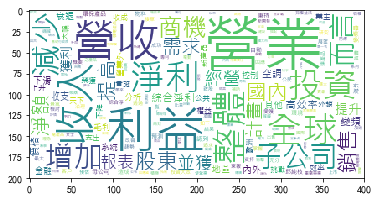

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('營業', 58),
 ('利益', 38),
 ('營收', 29),
 ('收入', 26),
 ('整體', 21),
 ('全球', 19),
 ('淨利', 18),
 ('投資', 17),
 ('減少', 15),
 ('增加', 14)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfe4e438>,
 <a list of 10 Text xticklabel objects>)

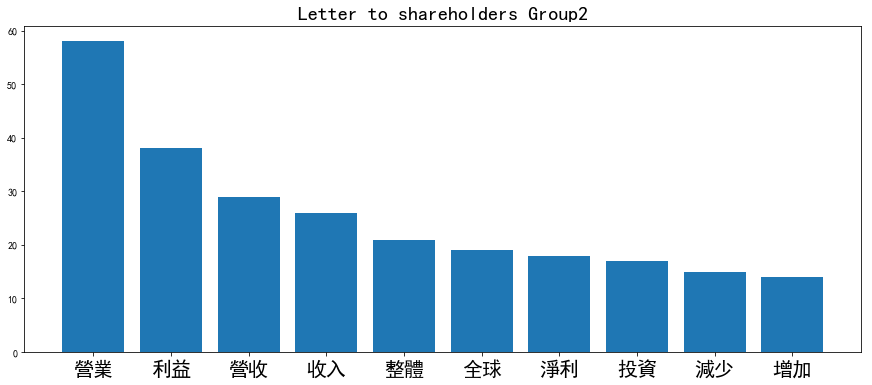

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.41694826, -0.11546675],
       [-0.37014963, -0.02764534],
       [-0.19198892, -0.08143747],
       [ 0.3248003 ,  0.67053312],
       [ 0.65428652, -0.44598355]])

No handles with labels found to put in legend.


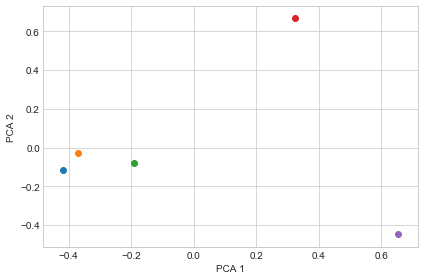

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

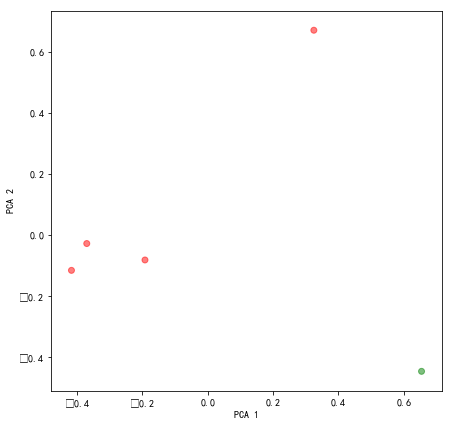

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()